<center><img src='../img/golden_gate_programming.jpg' alt='Golden Gate IA' height='300'/></center>

# Loading *joblib* models 

In this brief notebook, we will load models saved in **joblib** format, which were generated using the [train.py](../train.py) script within this project. 

Our aim here is to review and validate the prediction results once more before deployment, ensuring that the models are ready for production and meet the necessary performance standards.


# Load saved models and test validation

In [ ]:
import os
import sys

import joblib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import (ConfusionMatrixDisplay, classification_report,
                             confusion_matrix, roc_auc_score)

# add "src" path
root_path = os.path.abspath(os.path.join(os.getcwd(), '..')) 
if os.path.exists(root_path) and root_path not in sys.path: 
    sys.path.append(root_path)

from utils.config import TARGET

## Load from joblib

Test Set Metrics for LGBMClassifier tuned:
ROC AUC Score: 0.8860

Confusion Matrix:
[[37409  9109]
 [  544  2143]]

Heart Attack Classification Report:
              precision    recall  f1-score   support

          No       0.99      0.80      0.89     46518
         Yes       0.19      0.80      0.31      2687

    accuracy                           0.80     49205
   macro avg       0.59      0.80      0.60     49205
weighted avg       0.94      0.80      0.85     49205



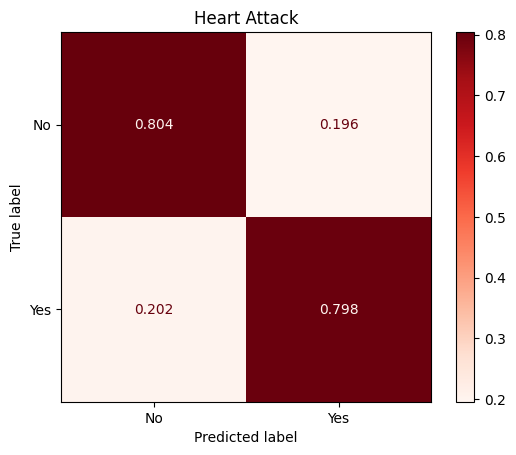

In [13]:
# load model from a joblib file
model = joblib.load('../models/lgbm_heart_model.joblib')
test_set = pd.read_csv('../data/processed/heart_disease_test.csv')
X_test = test_set.drop(columns=[TARGET])
y_test = test_set[TARGET]

# LGBMClassifier model pipeline. X_test predictions
X = X_test
y_encoded = y_test.map({'No': 0, 'Yes': 1})
y_pred = model.predict(X)

# ROC AUC score
roc_auc = roc_auc_score(y_encoded, model.predict_proba(X)[:, 1])
print(f'Test Set Metrics for LGBMClassifier tuned:')
print(f'ROC AUC Score: {roc_auc:.4f}', end='\n\n')

# confusion matrix
conf_matrix = confusion_matrix(y_encoded, y_pred)
print('Confusion Matrix:')
print(conf_matrix, end='\n\n')

# Generate and display the classification report
print('Heart Attack Classification Report:')
print(classification_report(y_encoded, y_pred, target_names=['No', 'Yes']))

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_encoded, y_pred, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, 
                       display_labels=['No', 'Yes']).plot(cmap='Reds', values_format='.3f')
plt.title('Heart Attack')
plt.show()

## Future Steps

In the future, other machine learning models that have been trained and saved previously can be implemented. These models can be used to make predictions on new data, allowing for further evaluation and comparison of their performance in real-world scenarios. Additionally, advanced techniques for optimization and hyperparameter tuning can be applied to improve model performance, as well as explore different approaches for handling class imbalance, which could further enhance the model's ability to detect heart attacks in high-risk patients.
